# 캐글필사  - Decision Tree and Random Forest Classifier Models

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
prathamtripathi_drug_classification_path = kagglehub.dataset_download('prathamtripathi/drug-classification')
prathamtripathi_classification_accuracy_97_5_path = kagglehub.notebook_output_download('prathamtripathi/classification-accuracy-97-5')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# /kagge/input에 아무것도 저장되어있지 않다면 아무것도 출력안됨.

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Data Review

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
file_path = "drug200.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "prathamtripathi/drug-classification",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", data.head())

First 5 records:    Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.info()
# null값 있는지 없는지, data type 확인하기.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# data 기술통계량
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# col간 상관계수 확인하기
# select_dtypes로 age,Na_to_K 외  categorical 변수들 제외시켜줌.
data.corr(numeric_only = True)

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: >

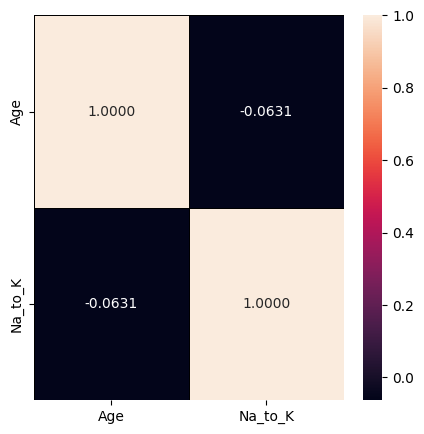

In [ ]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(numeric_only = True),annot = True,
           linewidth=0.5, linecolor = "black",
           fmt = ".4f", ax=ax)

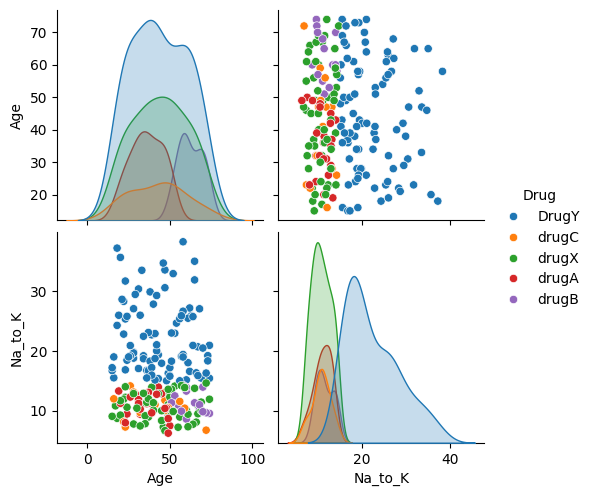

In [ ]:
sns.pairplot(data,hue="Drug")
# hue = "Drug" > data의 Drug열에 따라 색 구별

In [ ]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
data['Age'].value_counts(dropna=False)

,count
Age,
47,8
23,7
28,7
49,7
39,6
32,6
50,5
37,5
58,5


In [ ]:
data['Sex'].value_counts()

,count
Sex,
M,104
F,96


In [ ]:
data['BP'].value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [ ]:
data['Cholesterol'].value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


In [ ]:
data['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


# Data visualization

In [ ]:
dataAge = data["Age"].value_counts(dropna = False)
npar_dataAge = np.array(dataAge)
x = list(npar_dataAge) # 도수
y = data.Age.value_counts().index # 나이
print(x,"\n",y)
DataAge = {'Age':y,'Number':x}
DataAge = pd.DataFrame(DataAge)

fig = px.bar(DataAge,x='Age',y='Number')
fig.show()

[8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1] 
 Index([47, 23, 28, 49, 39, 32, 50, 37, 58, 60, 22, 34, 72, 51, 42, 26, 24, 74,
       67, 68, 61, 56, 20, 36, 45, 41, 31, 43, 65, 57, 53, 40, 70, 59, 16, 38,
       15, 69, 35, 18, 64, 52, 55, 62, 19, 29, 66, 73, 46, 48, 54, 17, 33, 63,
       30, 21, 25],
      dtype='int64', name='Age')


In [ ]:
colors = ['gold','mediumturquoise']
fig = go.Figure(data = [go.Pie(labels = ['M','F'],
                              values = [104, 96])])
fig.update_traces(hoverinfo = 'label + percent',
                 textinfo = 'value',
                 textfont_size = 20,
                 marker = dict(colors = colors,
                line = dict(color='#000000',width=2)))
fig.show() # 성별을 pie chart 로 나타냄

In [ ]:
# BP(Blood Pressure Levels)

fig = px.bar (x = ['High','Low','Normal'],
             y= [77,64,59]) # y는 사람수
fig.show()

In [ ]:
# Cholesterol 시각화
fig = px.histogram(x=['High','Normal'],
                  y = [103,97])
fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels=["DrugY","DrugX","DrugA","DrugC","DrugB"], values=[91,54,23,16,16])])

fig.update_traces(hoverinfo = 'label + percent', textinfo = 'value', textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu, line = dict( color = '#000000', width = 2)))

fig.show()

In [ ]:
# Drug의 수 dataset에서 시각화

fig = go.Figure(data = [go.Pie(labels = ["DrugY","DrugX","DrugA","DrugB","DrugC"],
                              values = [91,54,23,16,16])])
fig.update_traces(hoverinfo="label+percent", # 오타나면 안됨 단순히 x,y이름
                 textinfo = 'value',
                 textfont_size = 20,
                 marker = dict(colors = px.colors.sequential.RdBu,
                line = dict(color = "#000000", width = 2)))
fig.show()

#fig.update_traces
#hoverinfo : 마우스를 오렸을 때 표시할 정보 설정 ( label,value, percent)
#textinfo : 차트에 표시할 텍스트 정보 (label, value, percent) , +로 둘다 출력 가능


In [ ]:
fig = px.scatter(data, x = 'Na_to_K',y = 'Age',
                 color='Drug',size='Age',hover_data=['Na_to_K'])
fig.show()

# Classification Models

## Data Preparing

In [ ]:
dataclass = data.copy()

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# one-hot encoding / Male : 0, Female : 1
dataclass.Sex = [1 if i=='F' else 0 for i in dataclass.Sex]

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,DrugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,LOW,HIGH,11.567,drugC
196,16,0,LOW,HIGH,12.006,drugC
197,52,0,NORMAL,HIGH,9.894,drugX
198,23,0,NORMAL,NORMAL,14.020,drugX


In [ ]:
# one - hot encoding / low = 2, normal = 1, high = 0
for i in range(0,len(dataclass.BP)):
    if dataclass.BP[i] == "LOW":
        dataclass.BP[i] = 2
    elif dataclass.BP[i] == "NORMAL":
        dataclass.BP[i] = 1
    else:
        dataclass.BP[i] = 0

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,HIGH,25.355,DrugY
1,47,0,2,HIGH,13.093,drugC
2,47,0,2,HIGH,10.114,drugC
3,28,1,1,HIGH,7.798,drugX
4,61,1,2,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,HIGH,11.567,drugC
196,16,0,2,HIGH,12.006,drugC
197,52,0,1,HIGH,9.894,drugX
198,23,0,1,NORMAL,14.020,drugX


In [ ]:
# Cholesterol : High > 1 , Normal > 0
dataclass['Cholesterol'] = [1 if i == 'HIGH' else 0 for i in dataclass['Cholesterol']]

In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,DrugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,1,1,7.798,drugX
4,61,1,2,1,18.043,DrugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,1,1,9.894,drugX
198,23,0,1,0,14.020,drugX


In [ ]:
# Drug : Y > 4, X > 3, A > 2, C > 1, B > 0
for i in range(0,len(dataclass)):
    if dataclass.Drug[i] == "DrugY":
        dataclass.Drug[i] = 4
    elif dataclass.Drug[i] == "drugX":
        dataclass.Drug[i] = 3
    elif dataclass.Drug[i] == "drugA":
        dataclass.Drug[i] = 2
    elif dataclass.Drug[i] == "drugC":
        dataclass.Drug[i] = 1
    else:
        dataclass.Drug[i] = 0


In [ ]:
dataclass

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,0,1,25.355,4
1,47,0,2,1,13.093,1
2,47,0,2,1,10.114,1
3,28,1,1,1,7.798,3
4,61,1,2,1,18.043,4
...,...,...,...,...,...,...
195,56,1,2,1,11.567,1
196,16,0,2,1,12.006,1
197,52,0,1,1,9.894,3
198,23,0,1,0,14.020,3


In [ ]:
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


In [ ]:
# dataclass type int타입으로 변환
data_types_dict={'BP':int,"Drug":int}
dataclass=dataclass.astype(data_types_dict)
dataclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [ ]:
x_data = dataclass.drop(["Drug"],axis = 1)

y_data = dataclass.Drug.values

In [ ]:
x_data

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,0,1,25.355
1,47,0,2,1,13.093
2,47,0,2,1,10.114
3,28,1,1,1,7.798
4,61,1,2,1,18.043
...,...,...,...,...,...
195,56,1,2,1,11.567
196,16,0,2,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [ ]:
y_data

array([4, 1, 1, 3, 4, 3, 4, 1, 4, 4, 1, 4, 4, 4, 3, 4, 3, 2, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 0, 3, 4, 3, 3, 2, 3, 3, 3, 4, 0, 4, 3,
       3, 3, 2, 1, 4, 4, 4, 3, 4, 4, 0, 1, 0, 4, 3, 4, 4, 2, 4, 3, 0, 4,
       2, 3, 4, 4, 0, 4, 3, 4, 4, 4, 2, 4, 2, 3, 0, 3, 1, 2, 1, 0, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 2, 2, 1, 3, 4, 3, 3, 4, 0, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 0, 2, 0, 3, 2, 4, 0, 4, 2, 3, 3, 2, 3, 1, 2, 0, 3, 3,
       4, 1, 2, 4, 1, 3, 3, 0, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 4, 4, 2, 4,
       2, 4, 4, 4, 4, 3, 3, 4, 4, 4, 0, 2, 4, 4, 4, 2, 4, 1, 4, 1, 1, 3,
       3, 3])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,
                                                test_size=0.3,random_state =1)

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

predict = dtc.predict(X_test)

print('The accuracy of the DecisionTree is ',metrics.accuracy_score(predict,y_test))

The accuracy of the DecisionTree is  0.9666666666666667


### Decision Tree Classifier with 'gini'

In [ ]:
DTC_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=0)

DTC_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = DTC_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model Accuracy Score with criterion gini index : {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model Accuracy Score with criterion gini index : 0.9000


In [ ]:
y_pred_train_gini = DTC_gini.predict(X_train)
y_pred_train_gini

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
print('Training-set accuracy score:{0:.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Training-set accuracy score:0.9143


In [ ]:
print('Training set score: {:.4f}'.format(DTC_gini.score(X_train,y_train)))
print('Test set score: {:.4f}'.format(DTC_gini.score(X_test,y_test)))

Training set score: 0.9143
Test set score: 0.9000


### Decision Tree Classifier with "entropy"

In [ ]:
DTC_en = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3, random_state = 0)

DTC_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = DTC_en.predict(X_test)

In [ ]:
print('Model accuracy score with criterion entropy:{:.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy:0.9000


In [ ]:
y_pred_train_en = DTC_en.predict(X_train)

y_pred_train_en

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 3, 3, 2, 3, 4, 2, 0, 0, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 0, 0, 2, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 3, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 2, 3, 3, 3, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
print("Training-set accuracy score:{:.4f}".format(accuracy_score(y_train,y_pred_train_en)))

Training-set accuracy score:0.9143


In [ ]:
print('Training set score:{:.4f}'.format(DTC_en.score(X_train,y_train)))
print('Test set score:{:.4f}'.format(DTC_en.score(X_test,y_test)))

Training set score:0.9143
Test set score:0.9000


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

pred_rfc0 = rfc.predict(X_test)

print('The accuracy of the Random Forest is ',accuracy_score(pred_rfc0,y_test))

The accuracy of the Random Forest is  0.95


In [ ]:
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(X_train,y_train)
pred_rfc100 = rfc_100.predict(X_test)
print('The accuracy of the Random Forest is',accuracy_score(pred_rfc100,y_test))

The accuracy of the Random Forest is 0.95


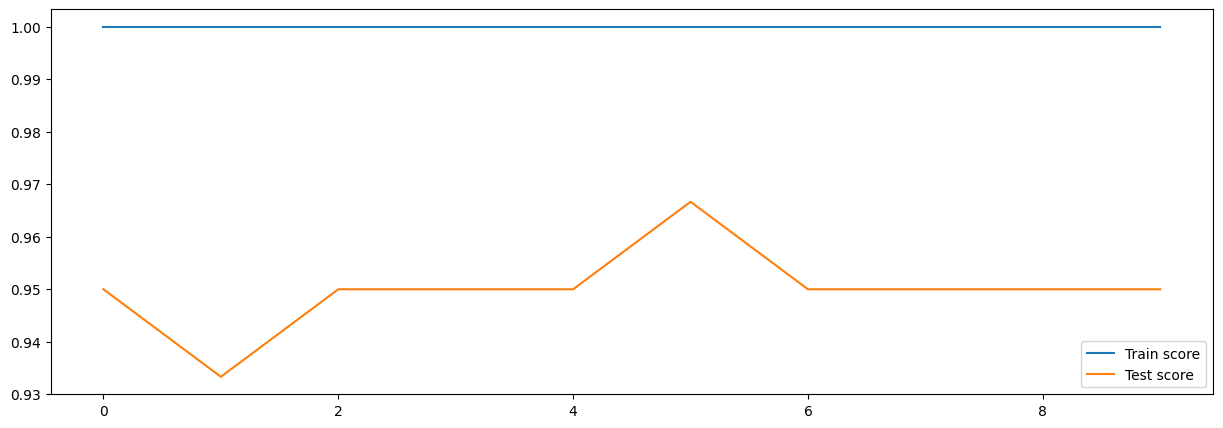

In [ ]:
# Finding best random_state value
test_score_list = []
train_score_list = []

for i in range(0,10):
  rfc2 = RandomForestClassifier(random_state=i)
  rfc2.fit(X_train,y_train)
  test_score_list.append(rfc2.score(X_test,y_test))
  train_score_list.append(rfc2.score(X_train,y_train))

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(0,10),y=train_score_list, markers='*',label = "Train score")
p = sns.lineplot(x=range(0,10),y=test_score_list, markers='o',label = "Test score")

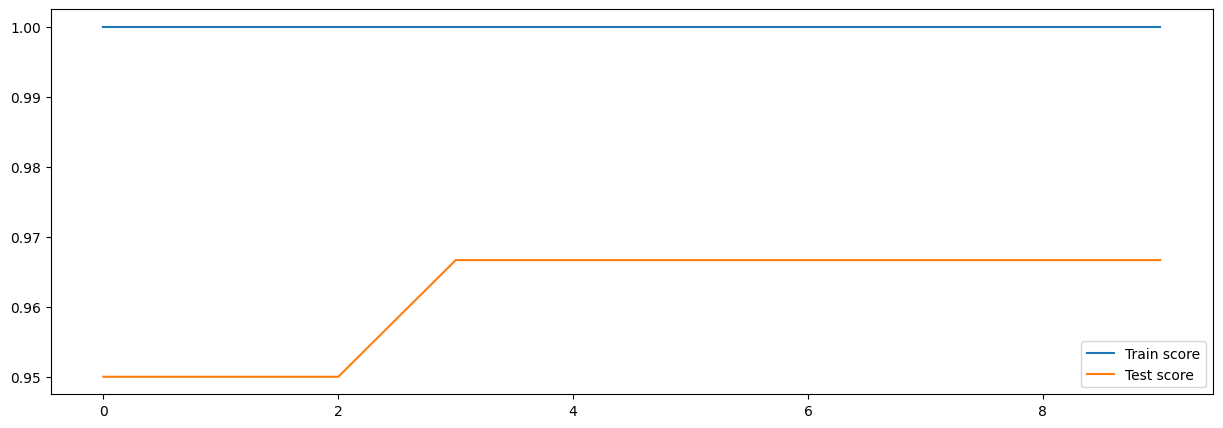

In [ ]:
# finding best n_estimators parameter
test_score_list = []
train_score_list = []

n_estimators_list = [10,20,30,40,50,60,70,80,90,100]
for i in range(0,len(n_estimators_list)):
  rfc3 = RandomForestClassifier(n_estimators=n_estimators_list[i],random_state=5)
  rfc3.fit(X_train,y_train)
  test_score_list.append(rfc3.score(X_test,y_test))
  train_score_list.append(rfc3.score(X_train,y_train))

plt.figure(figsize=(15,5))
p = sns.lineplot(x=range(0,len(n_estimators_list)),y=train_score_list, markers='*',label = "Train score")
p = sns.lineplot(x=range(0,len(n_estimators_list)),y=test_score_list, markers='o',label = "Test score")

### Random Forest Classifier With the Best Parameters

In [ ]:
final_rfc = RandomForestClassifier(n_estimators=100, random_state=5)

final_rfc.fit(X_train,y_train)

pred_fin = final_rfc.predict(X_test)

print('Model Accuracy score with best parameters :',accuracy_score(y_test,pred_fin))

Model Accuracy score with best parameters : 0.9666666666666667


In [ ]:
y_pred_fi_train = final_rfc.predict(X_train)

y_pred_fi_train

array([3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 0, 1, 4, 1, 4, 3, 4, 3, 4, 4, 4, 4,
       3, 4, 2, 4, 1, 3, 2, 3, 4, 2, 0, 0, 3, 3, 1, 3, 3, 4, 4, 4, 4, 3,
       1, 0, 0, 2, 4, 3, 4, 1, 4, 4, 1, 3, 4, 4, 2, 4, 4, 4, 2, 3, 4, 4,
       4, 3, 4, 1, 3, 2, 3, 2, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 0, 4, 0, 4,
       4, 0, 4, 4, 2, 3, 4, 3, 2, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4,
       4, 2, 3, 1, 1, 4, 3, 4, 4, 4, 0, 4, 2, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       2, 4, 3, 4, 2, 3, 2, 3])

In [ ]:
print('training-set accuracy score: {:.4f}'.format(accuracy_score(y_train, y_pred_fi_train)))

training-set accuracy score: 1.0000


In [ ]:
print('Training set score:{:.4f}'.format(final_rfc.score(X_train,y_train)))
print('Test set score:{:.4f}'.format(final_rfc.score(X_test,y_test)))

Training set score:1.0000
Test set score:0.9667


## Evaluation Classification Models with confusion matrix

### Confusion Matrix for DecisionTreeCalssifier Without Parameters

In [ ]:
from sklearn.metrics import confusion_matrix

cm_des = DecisionTreeClassifier()
cm_des.fit(X_train,y_train)

y_pred_cm = cm_des.predict(X_test)
y_true = y_test
cm_des1 = confusion_matrix(y_true,y_pred_cm)
cm_des1

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

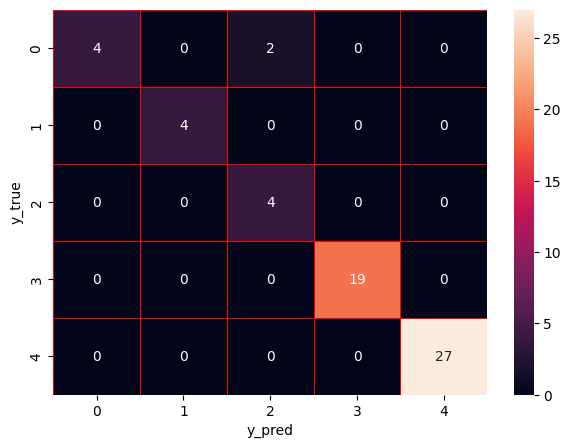

In [ ]:
f,ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des1,annot=True,
            linewidths=0.5, linecolor='red',fmt='.0f',ax=ax)
# annot = 셀 안에 숫자도 같이 출력
# fmt='.0f' = 정수형태로 출력
# ax = ax는 위에서 만든 축에 그려
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Confusion Matrix for DecisionTreeClassifier with "gini"

In [ ]:
cm_des_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

cm_des_gini.fit(X_train,y_train)

y_pred_cm = cm_des_gini.predict(X_test)
y_true = y_test

cm_des2 = confusion_matrix(y_true,y_pred_cm)
cm_des2

array([[ 4,  0,  2,  0,  0],
       [ 0,  0,  0,  4,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

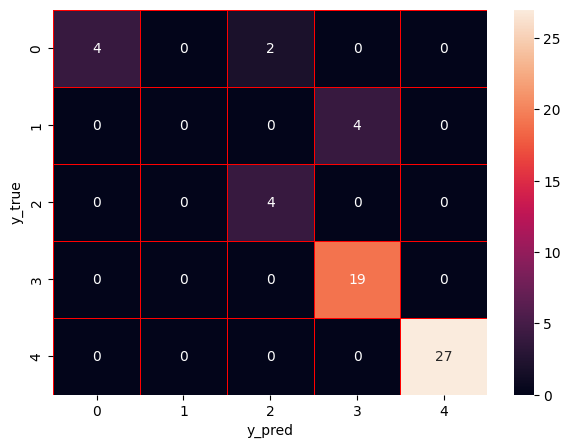

In [ ]:
f,ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_des2,annot=True,
            linewidths=0.5, linecolor='red',fmt='.0f',ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Confusion Matrix for RandomForestClassifier with the Best Parameters

In [ ]:
cm_last_rfc = RandomForestClassifier(n_estimators=100,random_state=5)
cm_last_rfc.fit(X_train,y_train)

y_pred_cm = cm_last_rfc.predict(X_test)
y_true = y_test

cm_rfc = confusion_matrix(y_true,y_pred_cm)
cm_rfc

array([[ 4,  0,  2,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 27]])

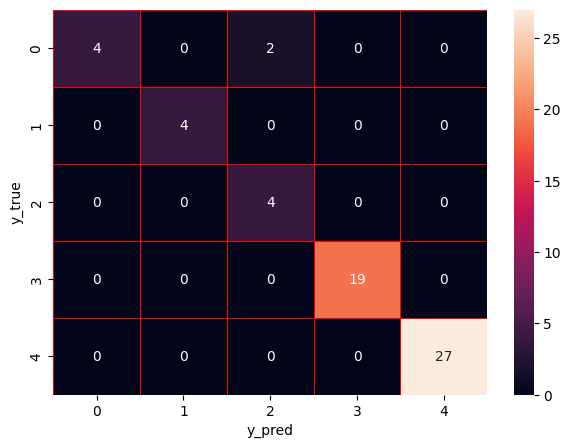

In [ ]:
f,ax = plt.subplots(figsize = (7,5))
sns.heatmap(cm_rfc,annot=True,linewidths=0.5,linecolor='red',fmt='.0f',ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# 캐글 실습 - Beginner Friendly CatBoost with Optuna

# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
!pip install optuna
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
!pip install numpy===1.23.5
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report

#importing plotly and cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(offline=True, world_readable=True)

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"

from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

100%|██████████| 8.56k/8.56k [00:00<00:00, 13.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [ ]:
import os
print(os.listdir(path))

['heart.csv']


In [ ]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',900)

pd.set_option('display.max_colwidth',200)

df = pd.read_csv(os.path.join(path,'heart.csv'))
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()
# no duplicates

0

In [ ]:
def missing(df):
  missing_number = df.isnull().sum().sort_values(ascending=False)
  missing_percent= (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  # concat([series1,series2],axis=1{행기준},
  #                          keys = [col명1, col명2]) > df로 series를 합쳐
  missing_values = pd.concat([missing_number,missing_percent],axis=1,
                             keys = ['Missing_Number','Missing_Percent'])
  return missing_values

missing(df) # missing값있는지 체크

,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


In [ ]:
numerical = df.drop(['HeartDisease'],axis = 1).select_dtypes('number').columns
categorical = df.select_dtypes('object').columns
# .columns > index type 객체
print(f'Numerical columns:{df[numerical].columns}\n')
print(f'categorical columns:{df[categorical].columns}\n')

Numerical columns:Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

categorical columns:Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')



In [ ]:
df[categorical].nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


## Target Variables

In [ ]:
y = df['HeartDisease']
display(y)
print(f'심장병양성(%):{np.round(y.value_counts(normalize=True)[1]*100,2)}')
print(f'----> {y.value_counts()[1]}명')
print(f'심장병음성(%):{np.round(y.value_counts(normalize=True)[0]*100,2)}')
print(f'----> {y.value_counts()[0]}명')

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


심장병양성(%):55.34
----> 508명
심장병음성(%):44.66
----> 410명


In [ ]:
df['HeartDisease'].iplot(kind='hist')

## Numerical Features

In [ ]:
df[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


In [ ]:
df[numerical].iplot(kind='hist')

In [ ]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)
# subplots = False(default),True / true면 히스토그램 다 분리, x축 신경쓰기

In [ ]:
skew_limit = 0.75
# threshold/limit to evaluate skewness.
# abs() 절댓값 함수
# abs(skewness) < 0.5 거의 대칭, 정규분포에 가까움
# 0.5 <= __ <= 1 : 약간 비대칭
# __ > 1(여기서는 0.75?인듯) : 심하게 비대칭 >> linear model
skew_vals = df[numerical].drop('FastingBS',axis=1).skew()
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending=False)
skew_cols

,0
Oldpeak,1.022872


- np.triu: 상관행렬의 upper triangle만 가져옴

heatmap의 parameter들

- vmin = -1, vmax = 1 : 상관계수 범위를 -1~1로 고정
- cmap = 'coolwarm' : 양(빨강) / 음(파랑) 의 상관관계 그라디언트
- mask = matrix : 사이즈가 heatmap의 data값과 맞아야 함

<Axes: >

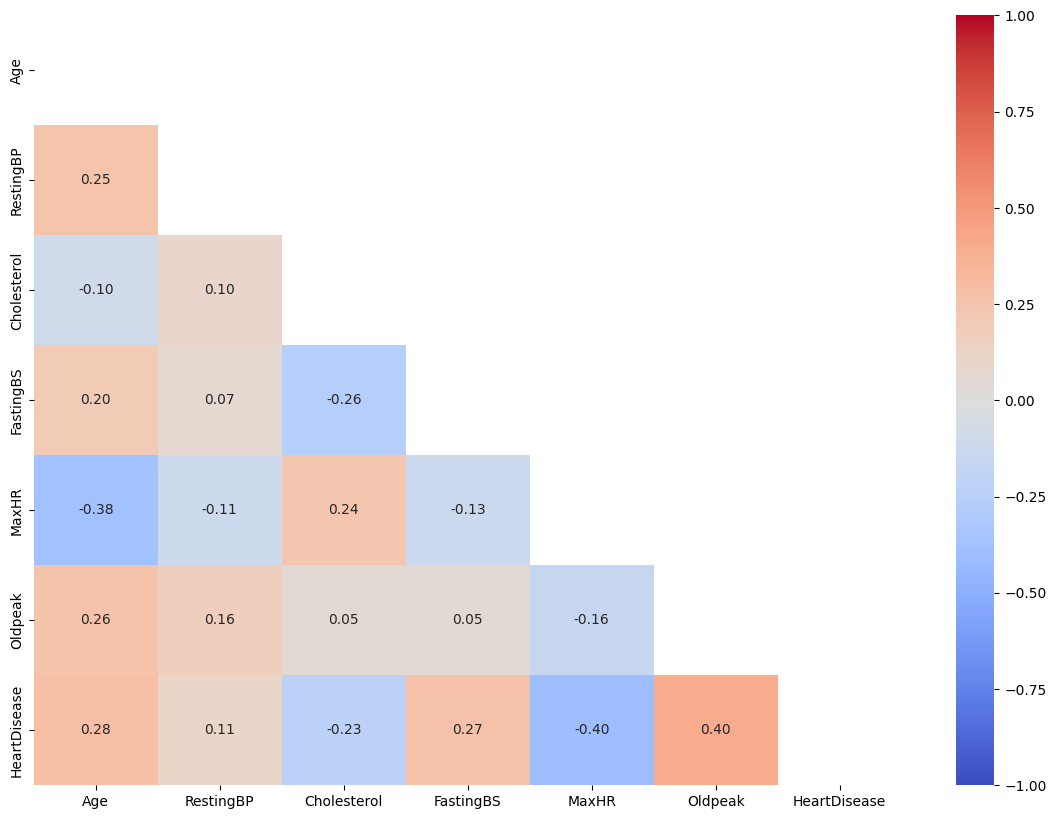

In [ ]:
numerical1 = df.select_dtypes('number').columns

matrix = np.triu(df[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df[numerical1].corr(),annot=True,
            fmt='.2f',vmin=-1,vmax=1,
            center=0,cmap='coolwarm',mask=matrix, ax=ax)


## Categorical Features

In [ ]:
df[categorical].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


### Gender vs Heart Disease

"      '__'     "

or ' "__" '

** 작은따옴표, 큰따옴표 주의하기

In [ ]:
print(f"여성이 심장병을 가질 확률: {np.round(df[df['Sex']=='F']['HeartDisease'].mean()*100,2)}\n")
print(f"남성이 심장병을 가질 확률: {np.round(df[df['Sex']=='M']['HeartDisease'].mean()*100,2)}")

여성이 심장병을 가질 확률: 25.91

남성이 심장병을 가질 확률: 63.17


In [ ]:
fig = px.histogram(df,x="Sex", color = "HeartDisease",width=400,height=400)
fig.show()
# px.histogram(data, x= col1, color = col2)

### Chest Pain Type vs HeartDisease

In [ ]:
fig = px.histogram(df,x="ChestPainType",color="HeartDisease",
                   width=400,height=400)
fig.show()

### RestingECG vs Heart Disease



In [ ]:
fig = px.histogram(df, x="RestingECG",color = "HeartDisease",width=400,height=400)
fig.show()

### ST_Slope and Heart Disease

In [ ]:
df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)

,HeartDisease
ST_Slope,
Flat,0.828261
Down,0.777778
Up,0.197468


In [ ]:
fig = px.histogram(df,x='ST_Slope',color='HeartDisease',width=400, height=400)
fig.show()

### Overall insights from EDA


* Target Variable ( HeartDisease ) 는 균형적인 데이터에 가깝다.
* 수치형 특징들은 Y와 큰 상관성을 보이지 않는다.
* Oldpeak은 heart disease와 양의 상관관계를 가진다.
* cholesterol은 heart disease와 음의 상관관계를 가진다.
* chest pain type은 라벨마다 큰 차이를 보인다. ( ASY인 사람이 ATA인사람보다 6배 더 심장병이 있을 확률이 높다. )
* Maximum heart rate는 heart disease와 음의 상관관계를 가진다.
* RestingECG은 라벨마다 크게 다르지 않다.(ST가 조금 더 높음)
* ST_Slope은 라벨마다 차이가 있다. (Up이 다른 두 세그먼트보다 심장병이 있을 확률이 작음.)




# Model Selection
- dummy classifier model - base model
- linear & logistic & discriminant & KNeighbors & SVM with/without Scaler
- ensemble models, Adaboost, randomforest, Gradient Boosing and Extra Trees
- XGBoost, LightGBM, Catboost
- hyperparameter tuning for Catboost

## Baseline Model - dummy classifier model
의미없는 모델을 먼저 돌려서, 나중에 만들 실제 머신러닝 모델들이 이 정확도보다 좋아야 한다는 기준선 만듦.

In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# categorical features > numerical features , passthrough = 숫자형 변수 통과
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder='passthrough')

# DummyClassifier : 아무 의미 없는 예측, 항상 1(HeartDisease)로 예측하게 설정
model = DummyClassifier(strategy='constant',constant=1)

# 모델과 원핫인코딩을 연결한 파이프라인 생성
pipe = make_pipeline(ct,model)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)

#Dummy Classifier의 정확도를 보여주는 데이터프레임 생성
accuracy.append(round(accuracy_score(y_test,y_pred),4))
print(f"model : {model}and accuracy score is : {round(accuracy_score(y_test,y_pred),4)}")
model_names = ['DummyClassifier']
dummy_result_df = pd.DataFrame({'Accuracy':accuracy},index = model_names)
dummy_result_df

model : DummyClassifier(constant=1, strategy='constant')and accuracy score is : 0.5942


,Accuracy
DummyClassifier,0.5942


## Logisitic & Linear Discriminant & SVC & KNN

In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# categorical features > numerical features , passthrough = 숫자형 변수 통과
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder='passthrough')

#Logisitic & Linear Discriminant & SVC & KNN 모델 생성
lr = LogisticRegression(solver='liblinear')
lda = LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]
for model in models:
  pipe = make_pipeline(ct,model)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  accuracy.append(round(accuracy_score(y_test,y_pred),4))
  print(f'model:{model} and accuracy score is {round(accuracy_score(y_test,y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors']
result_df1 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df1

model:LogisticRegression(solver='liblinear') and accuracy score is 0.8841
model:LinearDiscriminantAnalysis() and accuracy score is 0.8696
model:SVC() and accuracy score is 0.7246
model:KNeighborsClassifier() and accuracy score is 0.7174


,Accuracy
Logistic,0.8841
LinearDiscriminant,0.8696
SVM,0.7246
KNeighbors,0.7174


## Logisitic & Linear Discriminant & SVC & KNN with Scaler

In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

ohe = OneHotEncoder()
# StandardScaler로 스케일링
s = StandardScaler()
ct1 = make_column_transformer((ohe,categorical),(s,numerical))

#Logisitic & Linear Discriminant & SVC & KNN 모델 생성
lr = LogisticRegression(solver='liblinear')
lda = LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier()

models = [lr,lda,svm,knn]
for model in models:
  pipe = make_pipeline(ct1,model)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  accuracy.append(round(accuracy_score(y_test,y_pred),4))
  print(f'model:{model} and accuracy score is {round(accuracy_score(y_test,y_pred),4)}')

model_names = ['Logistic_sc1','LinearDiscriminant_sc1','SVM_sc1','KNeighbors_sc1']
result_df2 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df2

model:LogisticRegression(solver='liblinear') and accuracy score is 0.8804
model:LinearDiscriminantAnalysis() and accuracy score is 0.8696
model:SVC() and accuracy score is 0.8841
model:KNeighborsClassifier() and accuracy score is 0.8841


,Accuracy
Logistic_sc1,0.8804
LinearDiscriminant_sc1,0.8696
SVM_sc1,0.8841
KNeighbors_sc1,0.8841


## Ensemble Models (AdaBoost & Gradient Boosting & Random Forest & Extra Trees)


*   AdaBoost : 전 모델에서 오류가 난 데이터에게 다음 모델에서 가중치를 부여하면서 학습하는 방식
*   Gradient Boosting Classifier : 잔차(residual)을 줄이도록 새 모델을 추가하면서 점진적으로 성능 향상 ( 훈련 속도를 높인 보완 알고리즘 > XGBoost, LightGBM, CatBoost)
*  RandomForestClassifier : 여러개의 랜덤한 의사결정트리를 만들고, 다수결로 최종 예측 , 전처리에 민감 X , 오버피팅에 강함
*  ExtraTreesClassifier : 노드 분할 시 Random Forest보다 무작위성 큼, 수행속도가 더 빠르지만 성능이 조금 떨어질 수 있음. 매우 큰 데이터셋에 적합.



In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# categorical features > numerical features , passthrough = 숫자형 변수 통과
ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder='passthrough')

# AdaBoost, GradientBoosting, RandomForest,ExtraTree
ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et = ExtraTreesClassifier(random_state=0)

models = [ada,gb,rf,et]
for model in models:
  pipe = make_pipeline(ct,model)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  accuracy.append(round(accuracy_score(y_test,y_pred),4))
  print(f'model:{model} and accuracy score is {round(accuracy_score(y_test,y_pred),4)}')

model_names = ['Ada','Gradient','RandomForest','ExtraTree']
result_df3 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df3

model:AdaBoostClassifier(random_state=0) and accuracy score is 0.8732
model:GradientBoostingClassifier(random_state=0) and accuracy score is 0.8768
model:RandomForestClassifier(random_state=0) and accuracy score is 0.8877
model:ExtraTreesClassifier(random_state=0) and accuracy score is 0.8804


,Accuracy
Ada,0.8732
Gradient,0.8768
RandomForest,0.8877
ExtraTree,0.8804


## XGBoost & LightGBM & CatBoost

In [ ]:
accuracy = []
model_names = []

X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

ohe = OneHotEncoder()
ct = make_column_transformer((ohe,categorical),remainder='passthrough')

xgbc = XGBClassifier(random_state = 0)
lgmc = LGBMClassifier(random_state=0)

models = [xgbc,lgmc]

for model in models:
  pipe = make_pipeline(ct,model)
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  accuracy.append(round(accuracy_score(y_test,y_pred),4))

model_names = ['XGBoost','LightGBM']
result_df4 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df4

[LightGBM] [Info] Number of positive: 344, number of negative: 298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 642, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535826 -> initscore=0.143548
[LightGBM] [Info] Start training from score 0.143548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Accuracy
XGBoost,0.8478
LightGBM,0.8732


## CatBoost

### 목적 : training and applying models for classification problems

1. 사이킷런 wrapper class 제공
2. 다른 boosting 모델보다 categorical data처리에 탁월, 자동으로 인코딩 처리

### default optimized objective
* Logloss - 이진분류/target_border 파라미터가 지정되어 있을 떄
* MultiClass - 다중분류/border_count 파라미터가 지정되지 않았을 때

In [ ]:
accuracy = []
model_names = []

X= df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
# 범주형 변수(float가 아닌 변수)들 인덱스 체크하기
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = CatBoostClassifier(verbose = False, random_state=0)
# verbose = False : 진행상황 출력 생략
# cat_features : 범주형 번수 인덱스 알려줌
# eval_set : 테스트 데이터로 성능 확인
model.fit(X_train,y_train,cat_features = categorical_features_indices,
          eval_set=(X_test,y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df5

,Accuracy
Catboost_default,0.8804


## CatBoost HyperParameter Tuning with Optuna

### CatBoost hyperparameter 종류
1. objective : 학습의 목적 함수, 분류/회귀에 따라 달라짐.
binary : Logloss,CrossEntropy /
MultiClass : MultiClass, Regression : RMSE, MAE, Quantile
2. colsample_bylevel : 각 트리 레벨마다 사용할 피처의 비율 지정(0.5~1.0) default :1, speeds up the training, usually doesn't affect the quality.
3. depth
4. boosting_type : Default - 'Ordered' small dataset에 적합, 'Plain' - training 속도 ⬆(큰 dataset에 적합)
5. boostrap_type: Default - Bayesian(느림,정밀함) , Bernoulli: 빠름, overfitting ⬇, MVS 매우 빠름
6. subsample : 각 트리학습에 사용할 샘플 비율

In [ ]:
def objective(trial):
  X = df.drop('HeartDisease',axis = 1)
  y = df['HeartDisease']
  categorical_features_indices = np.where(X.dtypes != float)[0]

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

  param = {
      "objective":trial.suggest_categorical("objective",["Logloss","CrossEntropy"]),
      "colsample_bylevel" : trial.suggest_float("colsample_bylevel",0.01,0.1),
      "depth": trial.suggest_int("depth",1,12),
      "boosting_type" : trial.suggest_categorical("boosing_type",["Ordered","Plain"]),
      "bootstrap_type" : trial.suggest_categorical("boostrap_type",["Bayesian","Bernoulli","MVS"]),
      "used_ram_limit":"3gb"
  }
  if param["bootstrap_type"] == "Bayesian":
    param["bagging_temperature"] = trial.suggest_float("bagging_temperature",0,10)
  elif param["bootstrap_type"] == "Bernoulli":
    param["subsample"] = trial.suggest_float("subsample",0.1,1)

  cat_cls = CatBoostClassifier(**param)
  cat_cls.fit(X_train,y_train,eval_set = [(X_test,y_test)],
             cat_features = categorical_features_indices, verbose = 0,
             early_stopping_rounds=100)

  preds = cat_cls.predict(X_test)
  pred_labels = np.rint(preds)
  accuracy = accuracy_score(y_test,pred_labels)
  return accuracy

if __name__ == "__main__":
  study = optuna.create_study(direction="maximize")
  study.optimize(objective, n_trials=50, timeout = 600)

  print("Number of finished trials:{}".format(len(study.trials)))
  print("Best trial:")
  trial = study.best_trial
  print(" Value : {}".format(trial.values))

  print(" Params:")
  for key, value in trial.params.items():
    print(" {}:{}".format(key,value))


[I 2025-04-05 14:14:28,163] A new study created in memory with name: no-name-83072ead-5469-4a97-bfc1-884e2af996a7
[I 2025-04-05 14:14:33,727] Trial 0 finished with value: 0.8804347826086957 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.07094843834619223, 'depth': 6, 'boosing_type': 'Ordered', 'boostrap_type': 'Bayesian', 'bagging_temperature': 0.49056150255049835}. Best is trial 0 with value: 0.8804347826086957.
[I 2025-04-05 14:14:38,388] Trial 1 finished with value: 0.8804347826086957 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0723682815843798, 'depth': 7, 'boosing_type': 'Ordered', 'boostrap_type': 'Bayesian', 'bagging_temperature': 6.138720139808946}. Best is trial 0 with value: 0.8804347826086957.
[I 2025-04-05 14:14:39,456] Trial 2 finished with value: 0.8876811594202898 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.017240477864855296, 'depth': 11, 'boosing_type': 'Plain', 'boostrap_type': 'MVS'}. Best is tri

Number of finished trials:50
Best trial:
 Value : [0.9021739130434783]
 Params:
 objective:Logloss
 colsample_bylevel:0.011169026961546986
 depth:12
 boosing_type:Ordered
 boostrap_type:MVS


In [ ]:
# Best Model Parameters

accuracy = []
model_names = []

X= df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = CatBoostClassifier(verbose = False, random_state=0,
                           objective='Logloss',colsample_bylevel = 0.011169026961546986,
                           depth = 12,
                           boosting_type = 'Ordered',
                           bootstrap_type = "MVS")

model.fit(X_train,y_train,cat_features = categorical_features_indices,
          eval_set=(X_test,y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test,y_pred),4))
print(classification_report(y_test,y_pred))
model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy},index = model_names)
result_df6

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       112
           1       0.93      0.90      0.92       164

    accuracy                           0.90       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.90      0.90      0.90       276



,Accuracy
Catboost_tuned,0.9022


## Feature Importance

In [ ]:
feature_importance = np.array(model.get_feature_importance())
features = np.array(X_train.columns)
fi = {'features':features,
      'feature_importance':feature_importance}
df_fi = pd.DataFrame(fi)
df_fi.sort_values(by=['feature_importance'],
                      ascending=True,
                      inplace=True)
fig = px.bar(df_fi,x='feature_importance',
             y='features',
             title="CatBoost Feature Importance", height = 500)
fig.show()

## Model Comparison

In [ ]:
result_final = pd.concat([dummy_result_df, result_df1, result_df2, result_df3,
                          result_df4, result_df5, result_df6],axis=0)

In [ ]:
result_final.sort_values(by=['Accuracy'],ascending=True,inplace=True)
fig = px.bar(result_final, x='Accuracy',
             y = result_final.index, title = 'Model Comparison',
             height = 600, labels = {'index':'MODELS'})
fig.show()

# 파머완 4.9장 캐글 산탄테르 고객 만족 예측

분류

사용할 알고리즘 : XGBoost, LightGBM

클래스 레이블명 : Target( 0-불만,1-만족 고객)

모델의 성능 평가 : ROC-AUC ( 불균형한 데이터, 0 적음)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
cust_df = pd.read_csv("/content/drive/MyDrive/santander-customer-satisfaction/train.csv",
                      encoding='latin-1')
print("dataset shape:",cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info() # 총 371행, float형 111 + int형 260 > null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format(unsatisfied_cnt/total_cnt))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].replace(-9999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처데이터 shape:{}'.format(X_features.shape))

피처데이터 shape:(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_features,y_labels,
                                                 test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습세트 shape:{},테스트 세트 shape:{}'.format(X_train.shape,X_test.shape))

학습세트 shape:(60816, 369),테스트 세트 shape:(15204, 369)


In [8]:
print('학습 세트 레이블값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 레이블값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

테스트 세트 레이블값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [9]:
# X_train, y_train을 학습과 검증 데이터셋으로 분리
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,
                                         test_size=0.3, random_state=0)


## XGBoost 모델 학습과 하이퍼파라미터 튜닝

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators = 500, random_state = 156 예제 수행시마다 동일한 예측 결과
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05,
                        random_state=156, early_stopping=100,
                        eval_metric="auc")

# 성능 평가 : roc-auc, 조기중단 = 100
xgb_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83603	validation_1-auc:0.80978
[1]	validation_0-auc:0.83783	validation_1-auc:0.81126
[2]	validation_0-auc:0.83892	validation_1-auc:0.81192
[3]	validation_0-auc:0.84090	validation_1-auc:0.81349
[4]	validation_0-auc:0.84187	validation_1-auc:0.81356
[5]	validation_0-auc:0.84355	validation_1-auc:0.81422
[6]	validation_0-auc:0.84534	validation_1-auc:0.81550
[7]	validation_0-auc:0.84658	validation_1-auc:0.81623
[8]	validation_0-auc:0.84727	validation_1-auc:0.81669
[9]	validation_0-auc:0.84794	validation_1-auc:0.81668
[10]	validation_0-auc:0.84980	validation_1-auc:0.81828
[11]	validation_0-auc:0.85101	validation_1-auc:0.81966
[12]	validation_0-auc:0.85215	validation_1-auc:0.82001
[13]	validation_0-auc:0.85303	validation_1-auc:0.82047
[14]	validation_0-auc:0.85562	validation_1-auc:0.82219
[15]	validation_0-auc:0.85656	validation_1-auc:0.82298
[16]	validation_0-auc:0.85816	validation_1-auc:0.82379
[17]	validation_0-auc:0.85866	validation_1-auc:0.82369
[18]	validation_0-au

HyperOpt 를 이용해 베이지안 최적화 기반 XGBoost hyperparameter tuning

* max_depth - 5 ~ 15
* min_child_weight - 1 ~ 6
* colsample_bytree - 0.5 ~ 0.95
* learning_rate - 0.01 ~ 0.2 / 정규분포된 값

In [11]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth',5,15,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)}


In [15]:
from re import VERBOSE
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
  xgb_clf = XGBClassifier(n_estimators = 100,
                          max_depth = int(search_space['max_depth']),
                          min_child_weight = int(search_space['min_child_weight']),
                          colsample_bytree = search_space['colsample_bytree'],
                          learning_rate = search_space['learning_rate'],
                          early_stopping=30,
                          eval_metric = "auc",
                          VERBOSE=False)

  roc_auc_list = []

  # 3개 KFold 방식 적용
  kf = KFold(n_splits=3)
  # X_train > 학습 & 검증 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # split으로 추출된 학습과 검증 index로 학습과 검증 데이터셋 분리
    X_tr,y_tr = X_train.iloc[tr_index],y_train.iloc[tr_index]
    X_val,y_val = X_train.iloc[val_index],y_train.iloc[val_index]

    # early_stopping = 30, 추출된 학습/검증 데이터로 XGB classifier 학습 수행
    xgb_clf.fit(X_tr,y_tr,
                eval_set=[(X_tr,y_tr),(X_val,y_val)])
    # 1로 예측한 확률값 추출> auc 계산 > list에 결과값 담기 > 평균
    score = roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)

  # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1곱한후 반환
  return -1*np.mean(roc_auc_list)


In [16]:
from hyperopt import fmin,tpe,Trials

trials = Trials()

best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials, rstate=np.random.default_rng(seed=30))
print('best:',best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[2]	validation_0-auc:0.85352	validation_1-auc:0.81847
[3]	validation_0-auc:0.86061	validation_1-auc:0.82362
[4]	validation_0-auc:0.86434	validation_1-auc:0.82667
[5]	validation_0-auc:0.86710	validation_1-auc:0.82946
[6]	validation_0-auc:0.87088	validation_1-auc:0.83079
[7]	validation_0-auc:0.87217	validation_1-auc:0.82911
[8]	validation_0-auc:0.87333	validation_1-auc:0.83111
[9]	validation_0-auc:0.87188	validation_1-auc:0.82852
[10]	validation_0-auc:0.87371	validation_1-auc:0.83048
[11]	validation_0-auc:0.87579	validation_1-auc:0.83163
[12]	validation_0-auc:0.87872	validation_1-auc:0.83272
[13]	validation_0-auc:0.87962	validation_1-auc:0.83330
[14]	validation_0-auc:0.88025	validation_1-auc:0.83327
[15]	validation_0-auc:0.88066	validation_1-auc:0.83307
[16]	validation_0-auc:0.88243	validation_1-auc:0.83388
[17]	validation_0-auc:0.88383	validation_1-auc:0.83421
[18]	validation_0-auc:0.88502	validation_1-auc:0.83541
[19]	validation_0-auc:0.88600	validat

In [18]:
# n_estimators > 500, 최적 하이퍼 파리미터 기반 학습/예측
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate= round(best['learning_rate'],5),
                        max_depth = int(best['max_depth']),
                        min_child_weight = int(best['min_child_weight']),
                        colsample_bytree = round(best['colsample_bytree'],5),
                        early_stopping=100,
                        eval_metric = "auc",
                        )
# evaluation metric = auc, early_stopping = 100
xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82998	validation_1-auc:0.80459
[1]	validation_0-auc:0.83867	validation_1-auc:0.81411
[2]	validation_0-auc:0.83777	validation_1-auc:0.81224
[3]	validation_0-auc:0.84679	validation_1-auc:0.82054
[4]	validation_0-auc:0.84969	validation_1-auc:0.82162
[5]	validation_0-auc:0.84981	validation_1-auc:0.82360
[6]	validation_0-auc:0.85056	validation_1-auc:0.82423
[7]	validation_0-auc:0.85054	validation_1-auc:0.82374
[8]	validation_0-auc:0.85226	validation_1-auc:0.82474
[9]	validation_0-auc:0.85073	validation_1-auc:0.82374
[10]	validation_0-auc:0.85292	validation_1-auc:0.82598
[11]	validation_0-auc:0.85367	validation_1-auc:0.82729
[12]	validation_0-auc:0.85471	validation_1-auc:0.82836
[13]	validation_0-auc:0.85596	validation_1-auc:0.82826
[14]	validation_0-auc:0.85682	validation_1-auc:0.82894
[15]	validation_0-auc:0.85706	validation_1-auc:0.82952
[16]	validation_0-auc:0.85801	validation_1-auc:0.82966
[17]	validation_0-auc:0.85844	validation_1-auc:0.82957
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

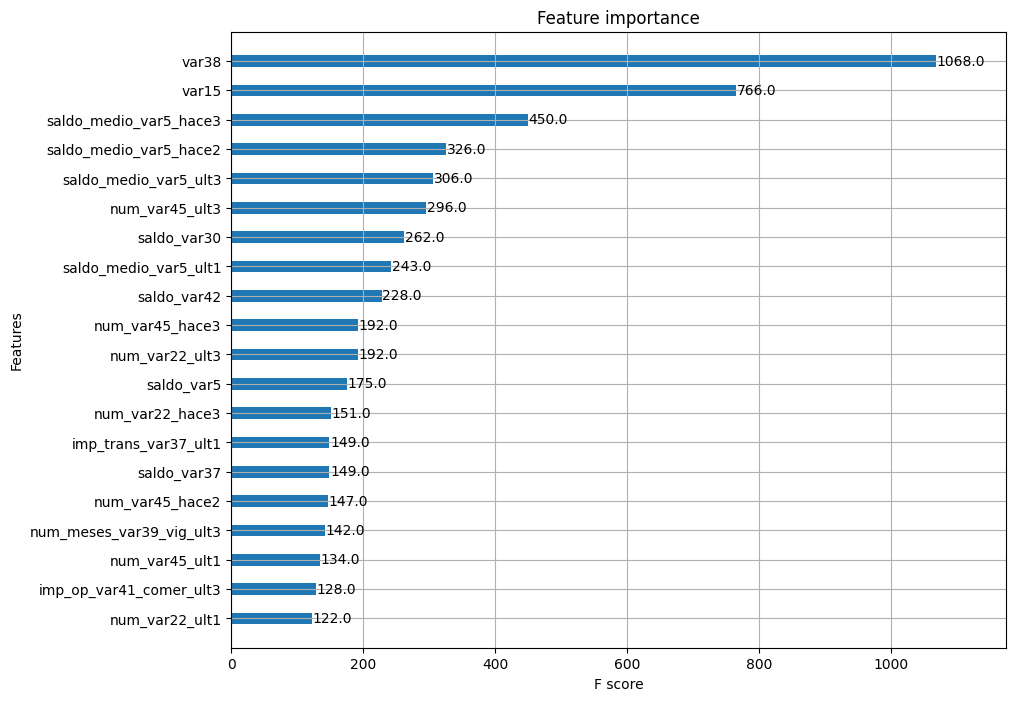

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax, max_num_features = 20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [25]:
# n_ estimators = 500, early_stopping = 100, eval_score = 'auc'
from lightgbm import LGBMClassifier,early_stopping,log_evaluation

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr,y_tr,
             eval_metric = 'auc',
             eval_set = eval_set,
             callbacks=[early_stopping(stopping_rounds=100),log_evaluation(1)])
lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.452617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13309
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's a

In [27]:
lgbm_search_space = {'num_leaves':hp.quniform('num_leaves',32,64,1),
                     'max_depth':hp.quniform('max_depth',100,160,1),
                     'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                     'subsample':hp.uniform('subsample',0.7,1),
                     'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [33]:
def objective_func(search_space):
  lgbm_clf = LGBMClassifier(n_estimators = 100,
                            num_leaves = int(search_space['num_leaves']),
                            max_depth = int(search_space['max_depth']),
                            min_child_samples = int(search_space['min_child_samples']),
                            subsample = search_space['subsample'],
                            learning_rate = search_space['learning_rate'])

  roc_auc_list = []

  # 3개 KFold 방식 적용
  kf = KFold(n_splits=3)
  # X_train > 학습 & 검증 데이터로 분리
  for tr_index, val_index in kf.split(X_train):
    # split으로 추출된 학습과 검증 index로 학습과 검증 데이터셋 분리
    X_tr,y_tr = X_train.iloc[tr_index],y_train.iloc[tr_index]
    X_val,y_val = X_train.iloc[val_index],y_train.iloc[val_index]

    # early_stopping = 30, 추출된 학습/검증 데이터로 LGBM classifier 학습 수행
    lgbm_clf.fit(X_tr,y_tr,
                 eval_set=[(X_tr,y_tr),(X_val,y_val)],
                 callbacks=[early_stopping(stopping_rounds=30),log_evaluation(1)],
                 eval_metric = "auc")

    # 1로 예측한 확률값 추출> auc 계산 > list에 결과값 담기 > 평균
    score = roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)

  # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1곱한후 반환
  return -1*np.mean(roc_auc_list)


In [34]:
from hyperopt import fmin,tpe,Trials

trials= Trials()

best = fmin(fn= objective_func,
            space = lgbm_search_space,
            algo = tpe.suggest,
            max_evals = 50, #최대 반복 횟수 지정
            trials = trials, rstate = np.random.default_rng(seed=30)
            )

print('best:',best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[12]	training's auc: 0.856869	training's binary_logloss: 0.141958	valid_1's auc: 0.822978	valid_1's binary_logloss: 0.147376
[13]	training's auc: 0.857838	training's binary_logloss: 0.140913	valid_1's auc: 0.823573	valid_1's binary_logloss: 0.146612
[14]	training's auc: 0.858934	training's binary_logloss: 0.139985	valid_1's auc: 0.824361	valid_1's binary_logloss: 0.145885
[15]	training's auc: 0.862115	training's binary_logloss: 0.139091	valid_1's auc: 0.825201	valid_1's binary_logloss: 0.145267
[16]	training's auc: 0.862734	training's binary_logloss: 0.138242	valid_1's auc: 0.825666	valid_1's binary_logloss: 0.144692
[17]	training's auc: 0.8632	training's binary_logloss: 0.137428	valid_1's auc: 0.825996	valid_1's binary_logloss: 0.144137
[18]	training's auc: 0.86371	training's binary_logloss: 0.13668	valid_1's auc: 0.826088	valid_1's binary_logloss: 0.143632
[19]	training's auc: 0.864532	training's binary_logloss: 0.135951	valid_1's auc: 0.826635	val

In [39]:
lgbm_clf = LGBMClassifier(n_estimators = 500,
                          num_leaves = int(best['num_leaves']),
                          min_child_samples=int(best['min_child_samples']),
                          subsample=round(best['subsample'],5),
                          learning_rate= round( best['learning_rate'],5))
lgbm_clf.fit(X_tr,y_tr, callbacks = [early_stopping(stopping_rounds=100),log_evaluation(1)],
             eval_metric="auc", eval_set = [(X_tr,y_tr),(X_val,y_val)])
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC : {:.4f}'.format(lgbm_roc_score))

[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12993
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
[1]	training's auc: 0.828044	training's binary_logloss: 0.162303	valid_1's auc: 0.810353	valid_1's binary_logloss: 0.163601
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.830474	training's binary_logloss: 0.160304	valid_1's auc: 0.810645	valid_1's binary_logloss: 0.161911
[3]	training's auc: 0.835072	training's binary_logloss: 0.158517	valid_1's auc: 0.813874	valid_1's binary_logloss: 0.160345
[4]	tra

# 파머완 4.10장 캐글 신용카드 사기 검출

In [40]:
!pip install -U imbalanced-learn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/creditcardfraud/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
from sklearn.model_selection import train_test_split
# df를 복사한 뒤 time 칼럼 삭제, 복사된 df 반환
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  df_copy.drop('Time',axis=1,inplace=True)
  return df_copy

In [43]:
# 사전 데이터 가공 후 trainset / testset 반환
def get_train_test_dataset(df= None):
  df_copy = get_preprocessed_df(df)
  # X, y 분리 df의 마지막 col이 y
  X_features = df_copy.iloc[:,:-1]
  y_target = df_copy.iloc[:,-1]
  # train_test_split 분할, Stratified 기반
  X_train,X_test,y_train,y_test = \
  train_test_split(X_features, y_target,
                   test_size = 0.3, random_state = 0,
                   stratify=y_target)

  return X_train,X_test,y_train,y_test
X_train,X_test, y_train, y_test = get_train_test_dataset(card_df)

print('학습 데이터 레이블 값 비율 \n')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율 \n')
print(y_test.value_counts()/y_test.shape[0] * 100)


학습 데이터 레이블 값 비율 

Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율 

Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [45]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test,lr_pred,lr_pred_proba)

오차 행렬
[[85280    15]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8598, 재현율: 0.6216,          F1: 0.7216, AUC:0.9738


In [67]:
# input : sklearn Estimator, trainset,testset > fit/predict/score
warnings.filterwarnings('ignore')
def get_model_train_eval(model, ftr_train=None,ftr_test=None, tgt_train=None, tgt_test = None):
  model.fit(ftr_train,tgt_train)
  pred = model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test, pred, pred_proba)


In [48]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves=64,
                          n_jobs = -1, boost_from_average = False)
get_model_train_eval(lgbm_clf,ftr_train = X_train, ftr_test = X_test,
                     tgt_train=y_train, tgt_test = y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.301818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

## 데이터 분포도 변환 후 모델 학습/예측/평가
왜곡된 분포도를 가지는 데이터를 재가공 뒤 모델 다시 테스트.

선형모델 - 중요 피처들의 값 정규 분포 형태 유지 선호

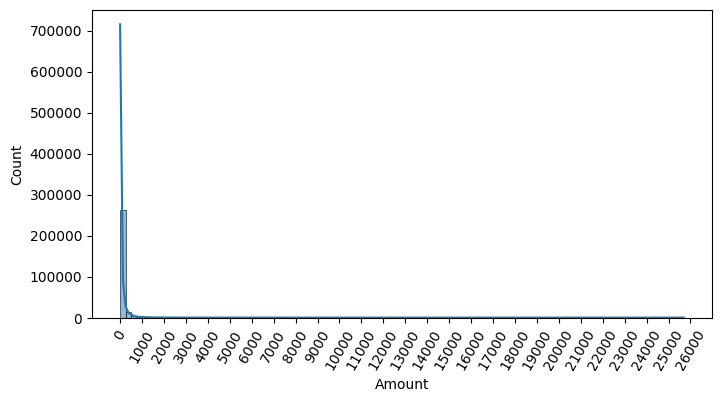

In [69]:
import seaborn as sns

plt.figure(figsize = (8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.histplot(card_df['Amount'],bins=100,kde=True)
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
# Amount 피처값 > StandardScaler > 정규분포형태
def get_preprocessed_df(df=None):
  df_copy =df.copy()
  scaler = StandardScaler()
  amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  # Scale된 amount를 Amount_Scaled로 df 칼럼에 저장
  df_copy.insert(0,'Amount_Scaled',amount_n)
  # Time,Amount 삭제
  df_copy.drop(['Time','Amount'], axis = 1, inplace =True)
  return df_copy

In [51]:
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression(max_iter = 1000)
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test = X_test,
                     tgt_train = y_train,tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average =False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test = X_test,
                     tgt_train = y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   55    93]]
정확도: 0.9992, 정밀도: 0.8692, 재현율: 0.6284,          F1: 0.7294, AUC:0.9706
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [52]:
# get_preprocessed_df( )를 로그변환 로직으로 변경
def get_preprocessed_def(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1,inplace=True)
  return df_copy

In [64]:
warnings.filterwarnings('ignore')
X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)

print('### 로그 변환 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test = X_test,
                     tgt_train = y_train,tgt_test=y_test)
print('### 로그 변환 LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test = X_test,
                     tgt_train = y_train,tgt_test=y_test)

### 로그 변환 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,          F1: 0.7568, AUC:0.9725
### 로그 변환 LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## 이상치 데이터 제거 후 모델 학습,예측, 평가
1. target과 가장 상관성이 높은 피처 찾기
2. outlier 찾기 > IQR (Inter Quantile Range )방식 사용


<Axes: >

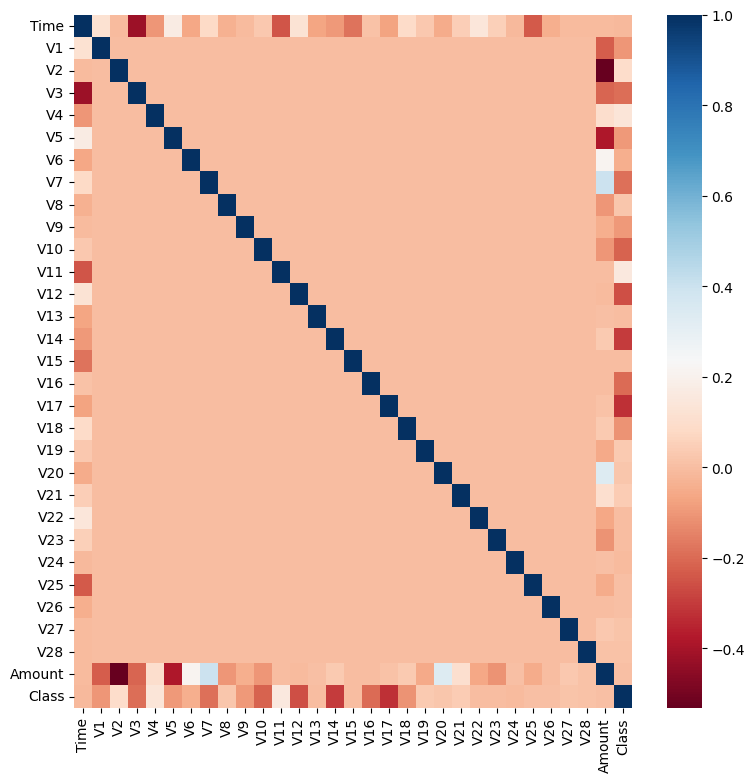

In [56]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr,cmap='RdBu')

In [61]:
import numpy as np # numpy의 percentile을 이용해 Q1,Q3 구하기

def get_outlier(df=None,column=None,weight=1.5):
  # fraud에 해당하는 column 데이터만 추출, Q1,Q3구하기
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values,25)
  quantile_75 = np.percentile(fraud.values,75)

  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  low_fenc = quantile_25- iqr_weight
  up_fenc = quantile_75 + iqr_weight

  outlier_index = fraud[(fraud<low_fenc)|(fraud>up_fenc)].index
  return outlier_index

In [62]:
outlier_index = get_outlier(df=card_df, column='V14',weight=1.5)
print('이상치 데이터 인덱스:',outlier_index)

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [71]:
# get_preprocessed_df를 로그 변환후 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1,inplace=True)

  outlier_index = get_outlier(df=df_copy,column='V14',weight=1.5)
  df_copy.drop(outlier_index,axis=0,inplace=True)
  return df_copy

X_train,X_test,y_train,y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,
                     tgt_train=y_train,tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85280    15]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8673, 재현율: 0.6712,          F1: 0.7568, AUC:0.9725
### LightGBM 예측 성능 ###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- SMOTE를 적용할 때는 반드시 학습 데이터셋만 오버샘플링 해야함
- 검증/테스트 데이터셋을 오버 샘플링할 시 원본 데이터가 아닌 데이터셋에서 검증.테스트를 수행하기 때문에 의미가 없어짐

In [72]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용전 X_train,y_train : ', X_train.shape ,y_train.shape)
print('SMOTE 적용후 X_train,y_train : ', X_train_over.shape ,y_train_over.shape)
print('SMOTE 적용 후 레이블값 분포:\n',pd.Series(y_train_over).value_counts())

SMOTE 적용전 X_train,y_train :  (199362, 29) (199362,)
SMOTE 적용후 X_train,y_train :  (398040, 29) (398040,)
SMOTE 적용 후 레이블값 분포:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [74]:
lr_clf = LogisticRegression(max_iter=1000)

get_model_train_eval(lr_clf,ftr_train=X_train_over,ftr_test=X_test,
                    tgt_train = y_train_over, tgt_test = y_test)

오차 행렬
[[82933  2362]
 [   11   135]]
정확도: 0.9722, 정밀도: 0.0541, 재현율: 0.9247,          F1: 0.1022, AUC:0.9736


In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


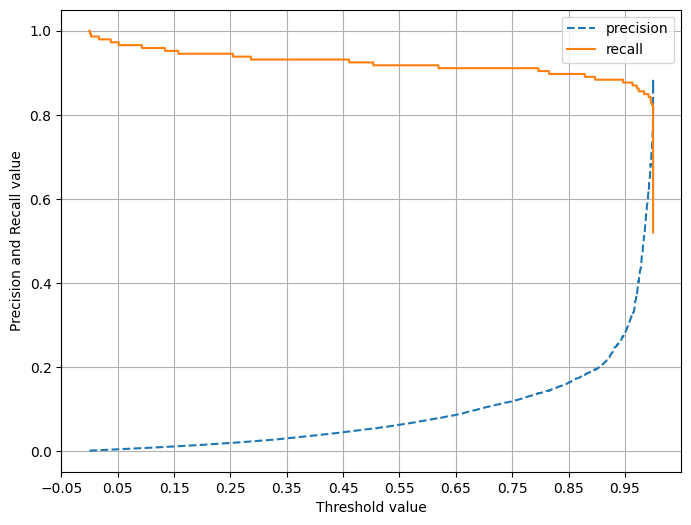

In [78]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

In [80]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1,
                          boost_from_average = False,verbosity=-1)
get_model_train_eval(lgbm_clf,ftr_train=X_train_over, ftr_test = X_test,
                     tgt_train = y_train_over, tgt_test = y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,          F1: 0.8794, AUC:0.9814
